## Key Steps in Building a Machine Learning Model (Crop Recommendation System)

1. **Data Collection**  
   - Load dataset (e.g., CSV from Kaggle or other sources).

2. **EDA & Preprocessing**  
   - Exploratory Data Analysis (EDA): Understand feature distributions, correlations.  
   - Preprocessing: Handle missing values, normalize/scale data, encode if necessary.

3. **Model Selection & Training**  
   - Choose appropriate algorithms (e.g., Random Forest, SVM, KNN).  
   - Train models using the training data.

4. **Model Evaluation**  
   - Use metrics like accuracy, precision, recall, F1-score on test data.

5. **Prediction & Saving the Model**  
   - Make predictions on new data.  
   - Save the model using `joblib` or `pickle` for later use/deployment.


In [1]:
#starting with the crop and fertiliser recommendation system

## Data collection

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#uploading the csv file and converting it into a dataframe
crop=pd.read_csv('crop file.csv')

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
#checking the basic information of the dataset
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.shape

(2200, 8)

In [8]:
#checking for any missing values in the dataset
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
#checking for any duplicated values in the dataset
crop.duplicated().sum()

0

## Exploring the data (EDA)

In [10]:
#checking the target distribution
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
#dropping the label column to split data into features and target
features=crop.columns.to_list() #converting the columns to list for furthur exploration
features.remove('label')  #dropping label column
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


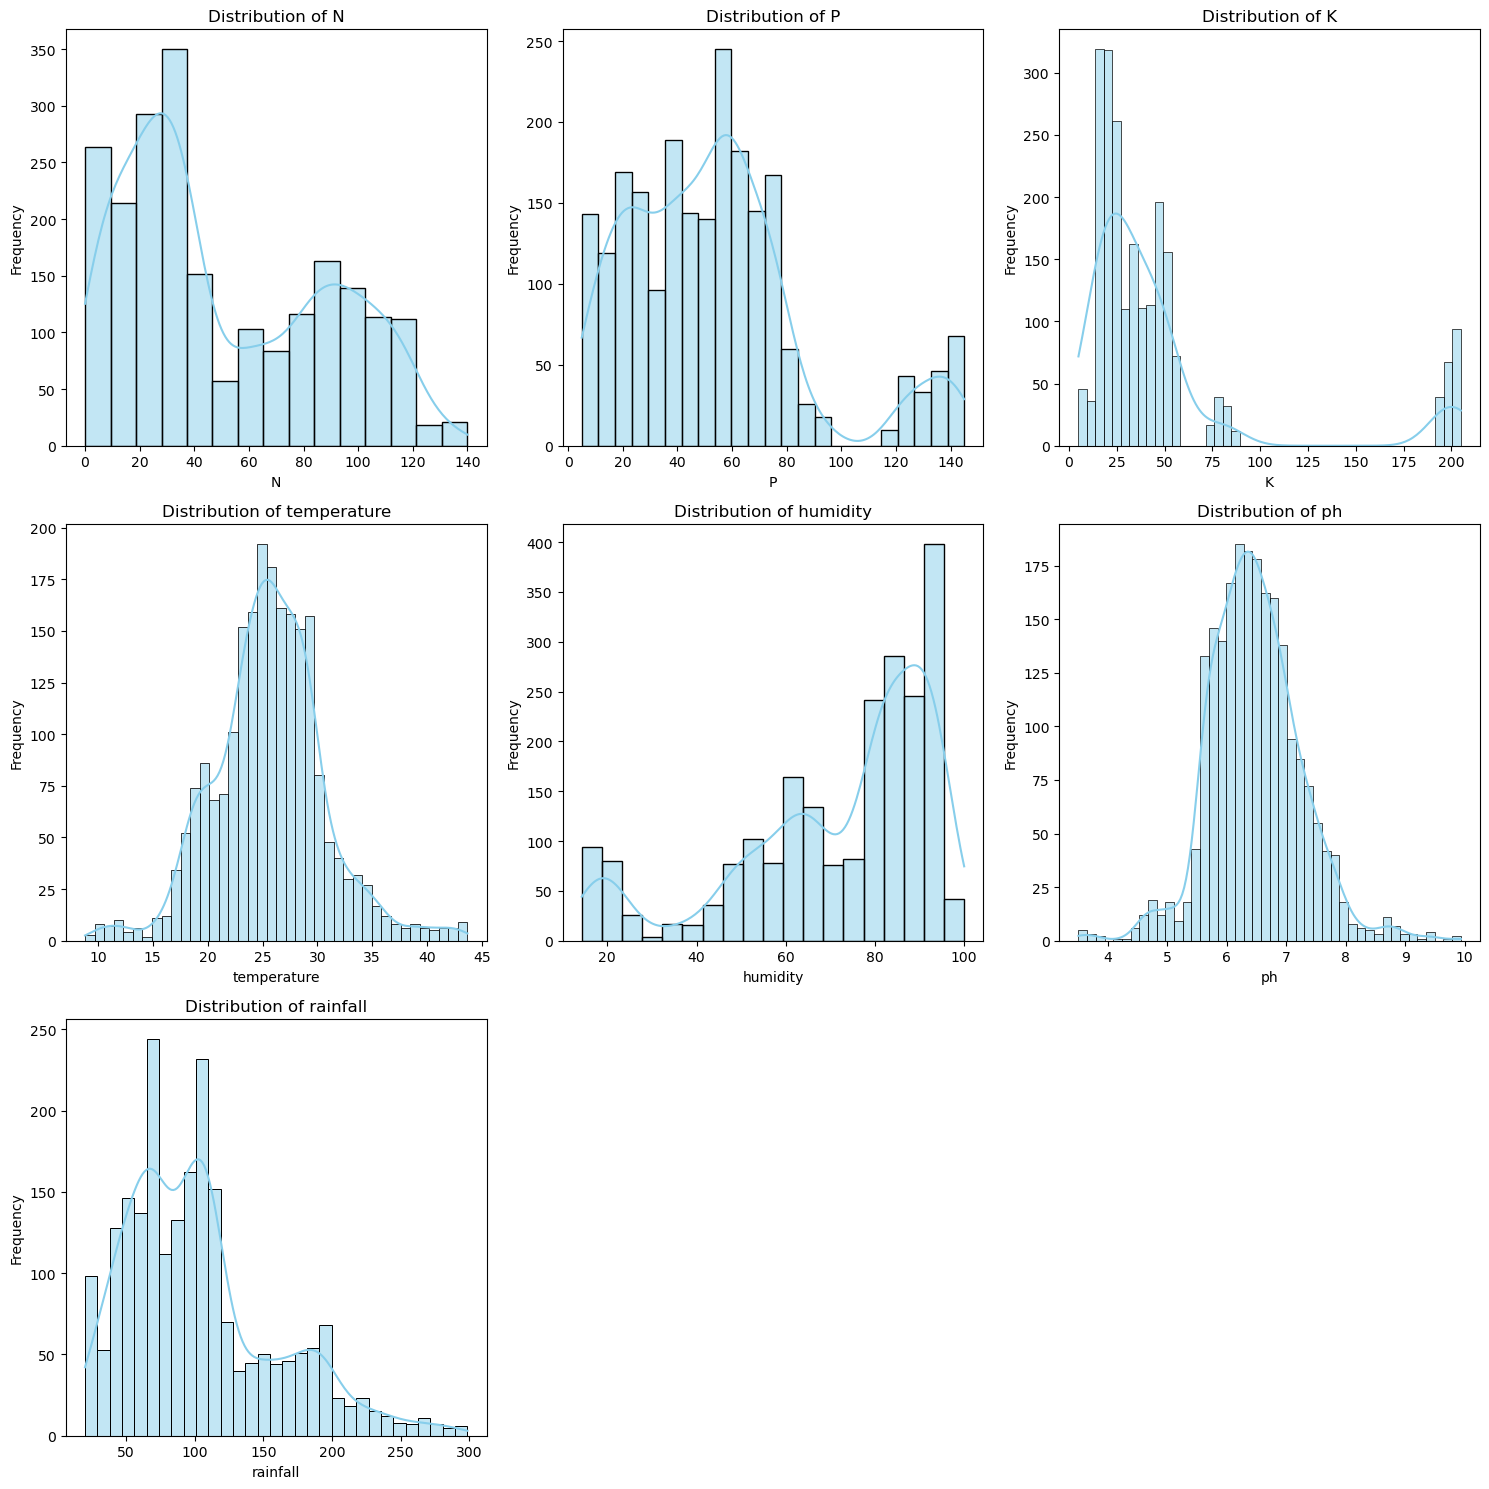

In [12]:
#visualizing the distribution of each feature
#using histogram

# Create a 3x3 grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Loop through each feature and its corresponding subplot
#ax.flatten() flattens the 2D grid of axes so you can iterate over it in 1D.
for i, subplot in zip(features, ax.flatten()):
    # Plot histogram with KDE (density curve)
    sns.histplot(crop[i], ax=subplot, kde=True, color='skyblue', edgecolor='black') #plots both histogram and a smooth density curve.
    
    # Set the title of each subplot as the feature name
    subplot.set_title(f'Distribution of {i}', fontsize=12)
    
    # Improve readability
    subplot.set_xlabel(i)
    subplot.set_ylabel('Frequency')

# Remove any unused subplots (if total plots < 9)
for j in range(len(features), 9):
    fig.delaxes(ax.flatten()[j])

# Adjust spacing between plots to avoid overlap
plt.tight_layout()

# Display all subplots
plt.show()


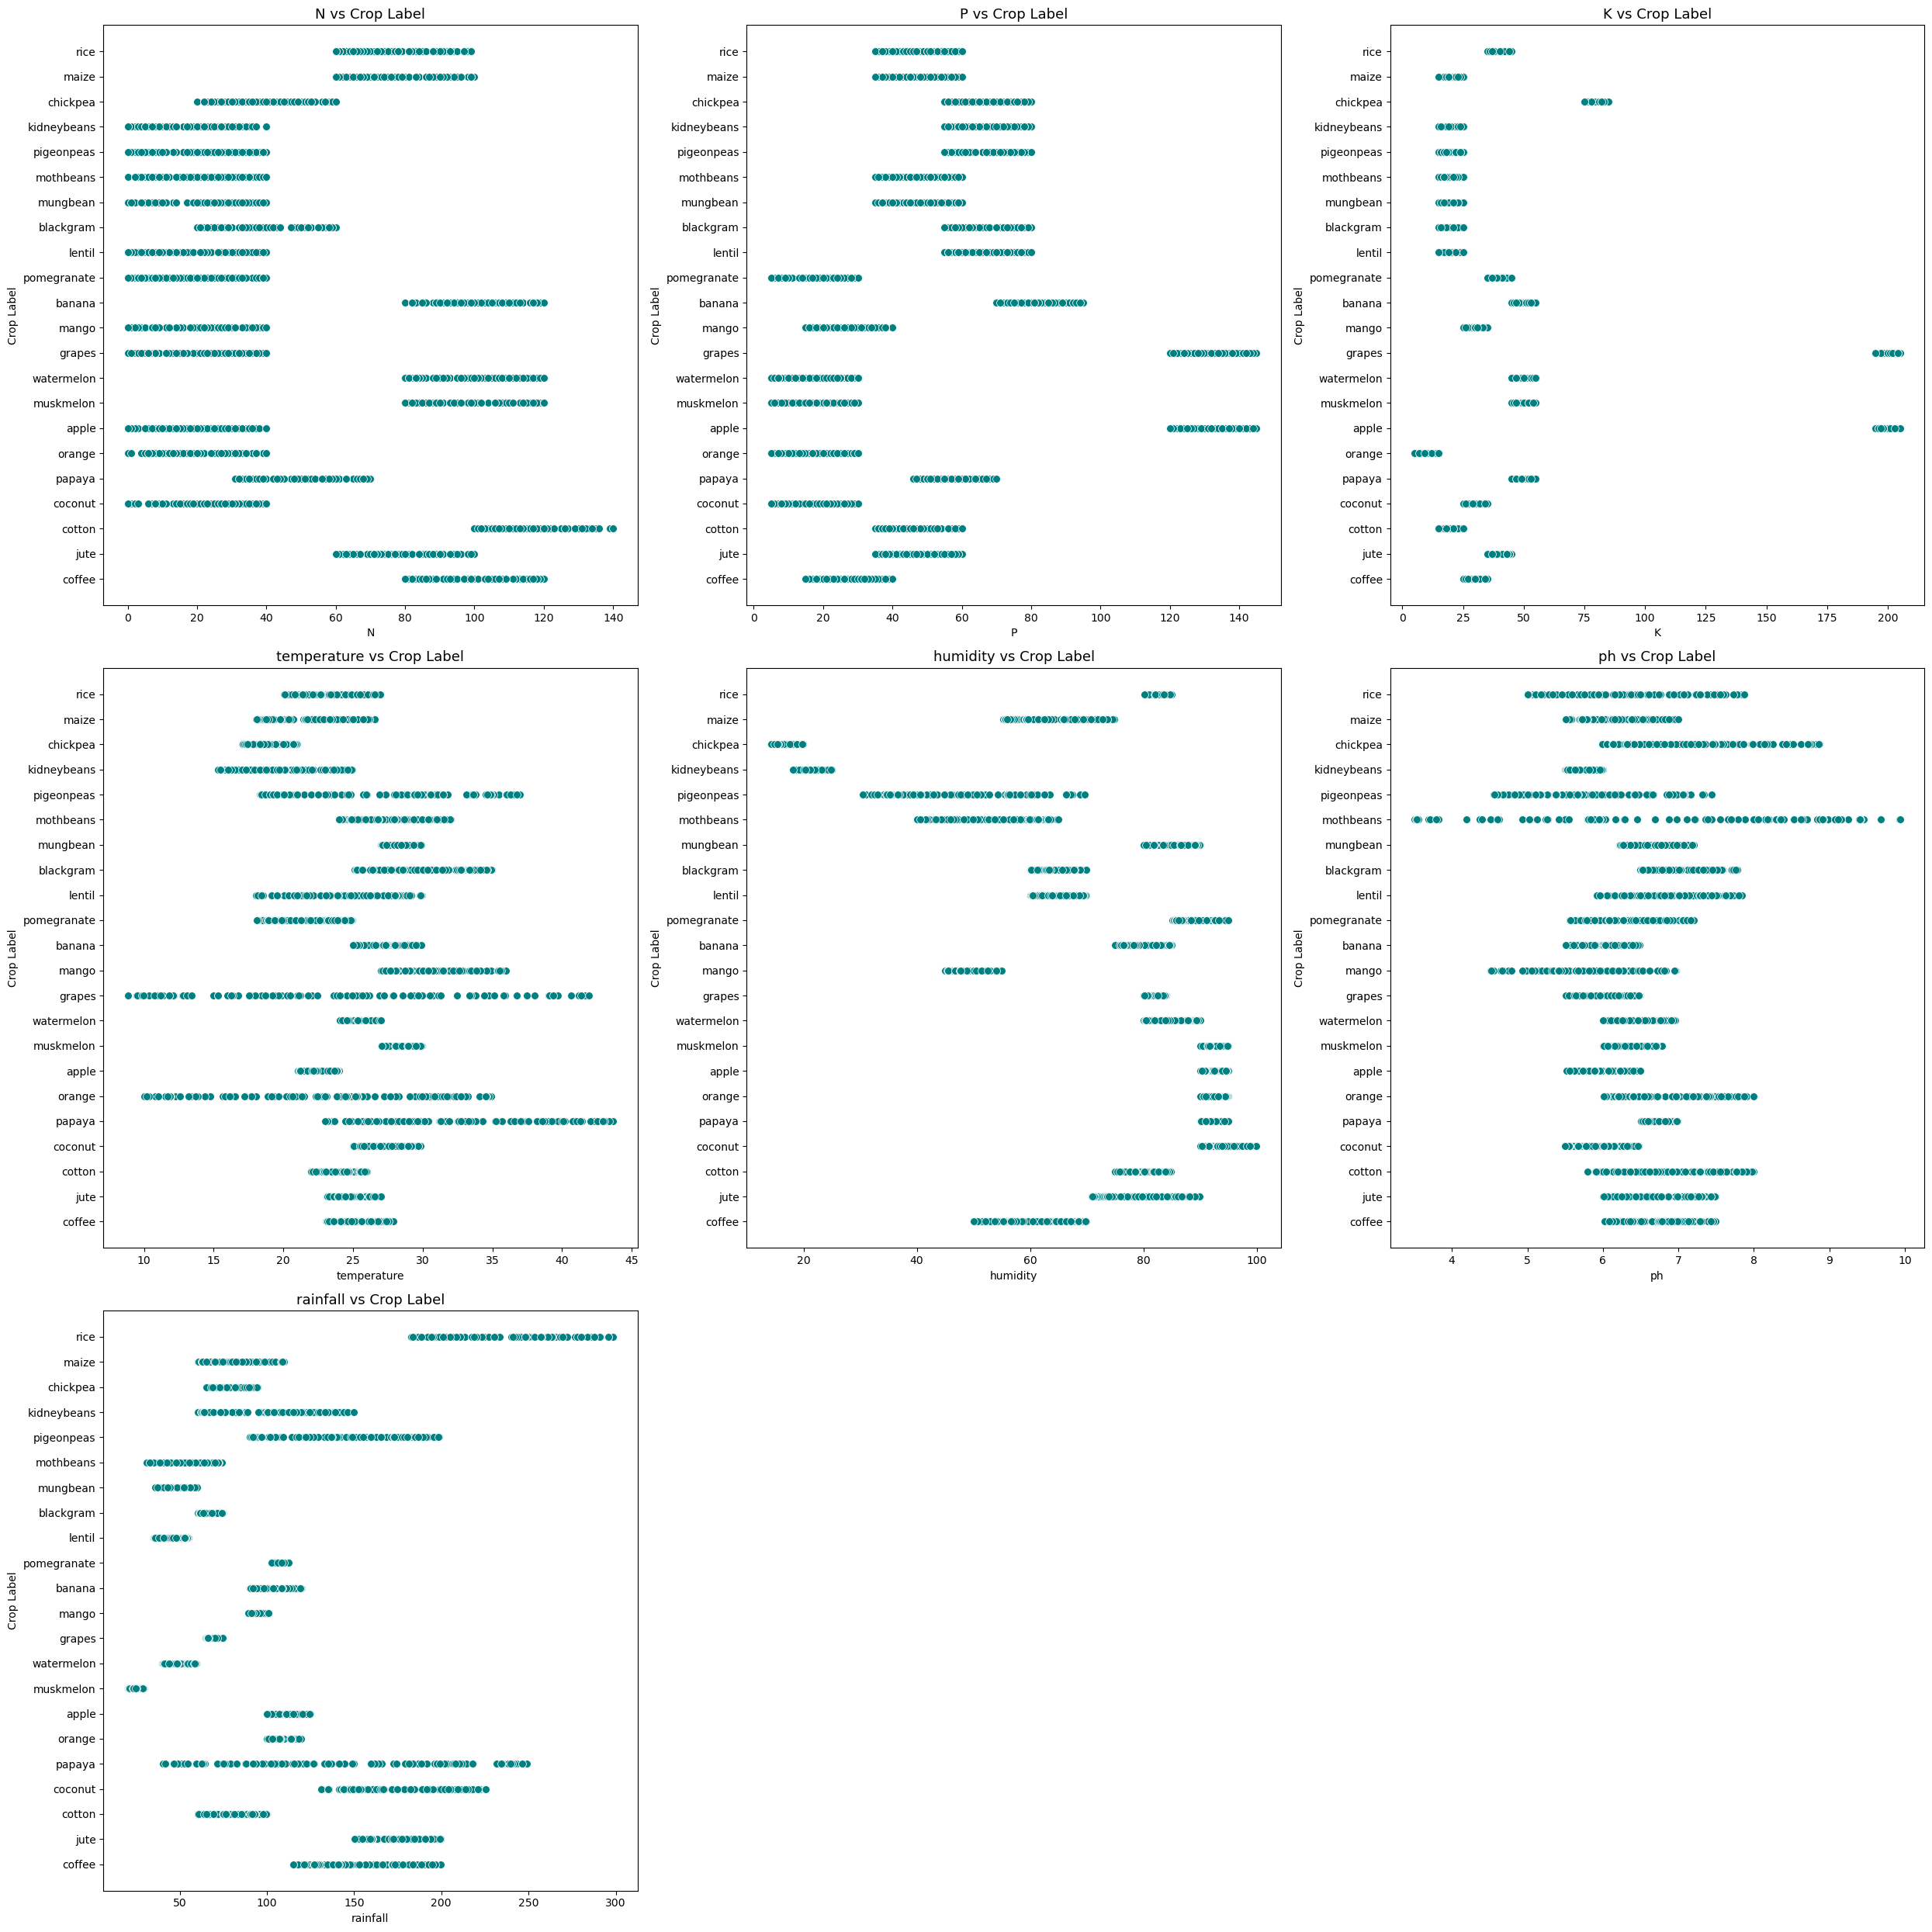

In [13]:
#plot scatter plot of each feature against the target

# Create a 3x3 grid of subplots (adjust grid size based on number of features)
fig, ax = plt.subplots(3, 3, figsize=(25,25)) 

# Loop through each feature and corresponding subplot
for i, subplot in zip(features, ax.flatten()):
    # Create a scatter plot with feature on X-axis and target label on Y-axis
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot, color='teal', s=50)
    
    # Set subplot title and axis labels
    subplot.set_title(f'{i} vs Crop Label', fontsize=13)
    subplot.set_xlabel(i)
    subplot.set_ylabel('Crop Label')

# Remove any unused subplots (if total plots < 9)
for j in range(len(features), 9):
    fig.delaxes(ax.flatten()[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


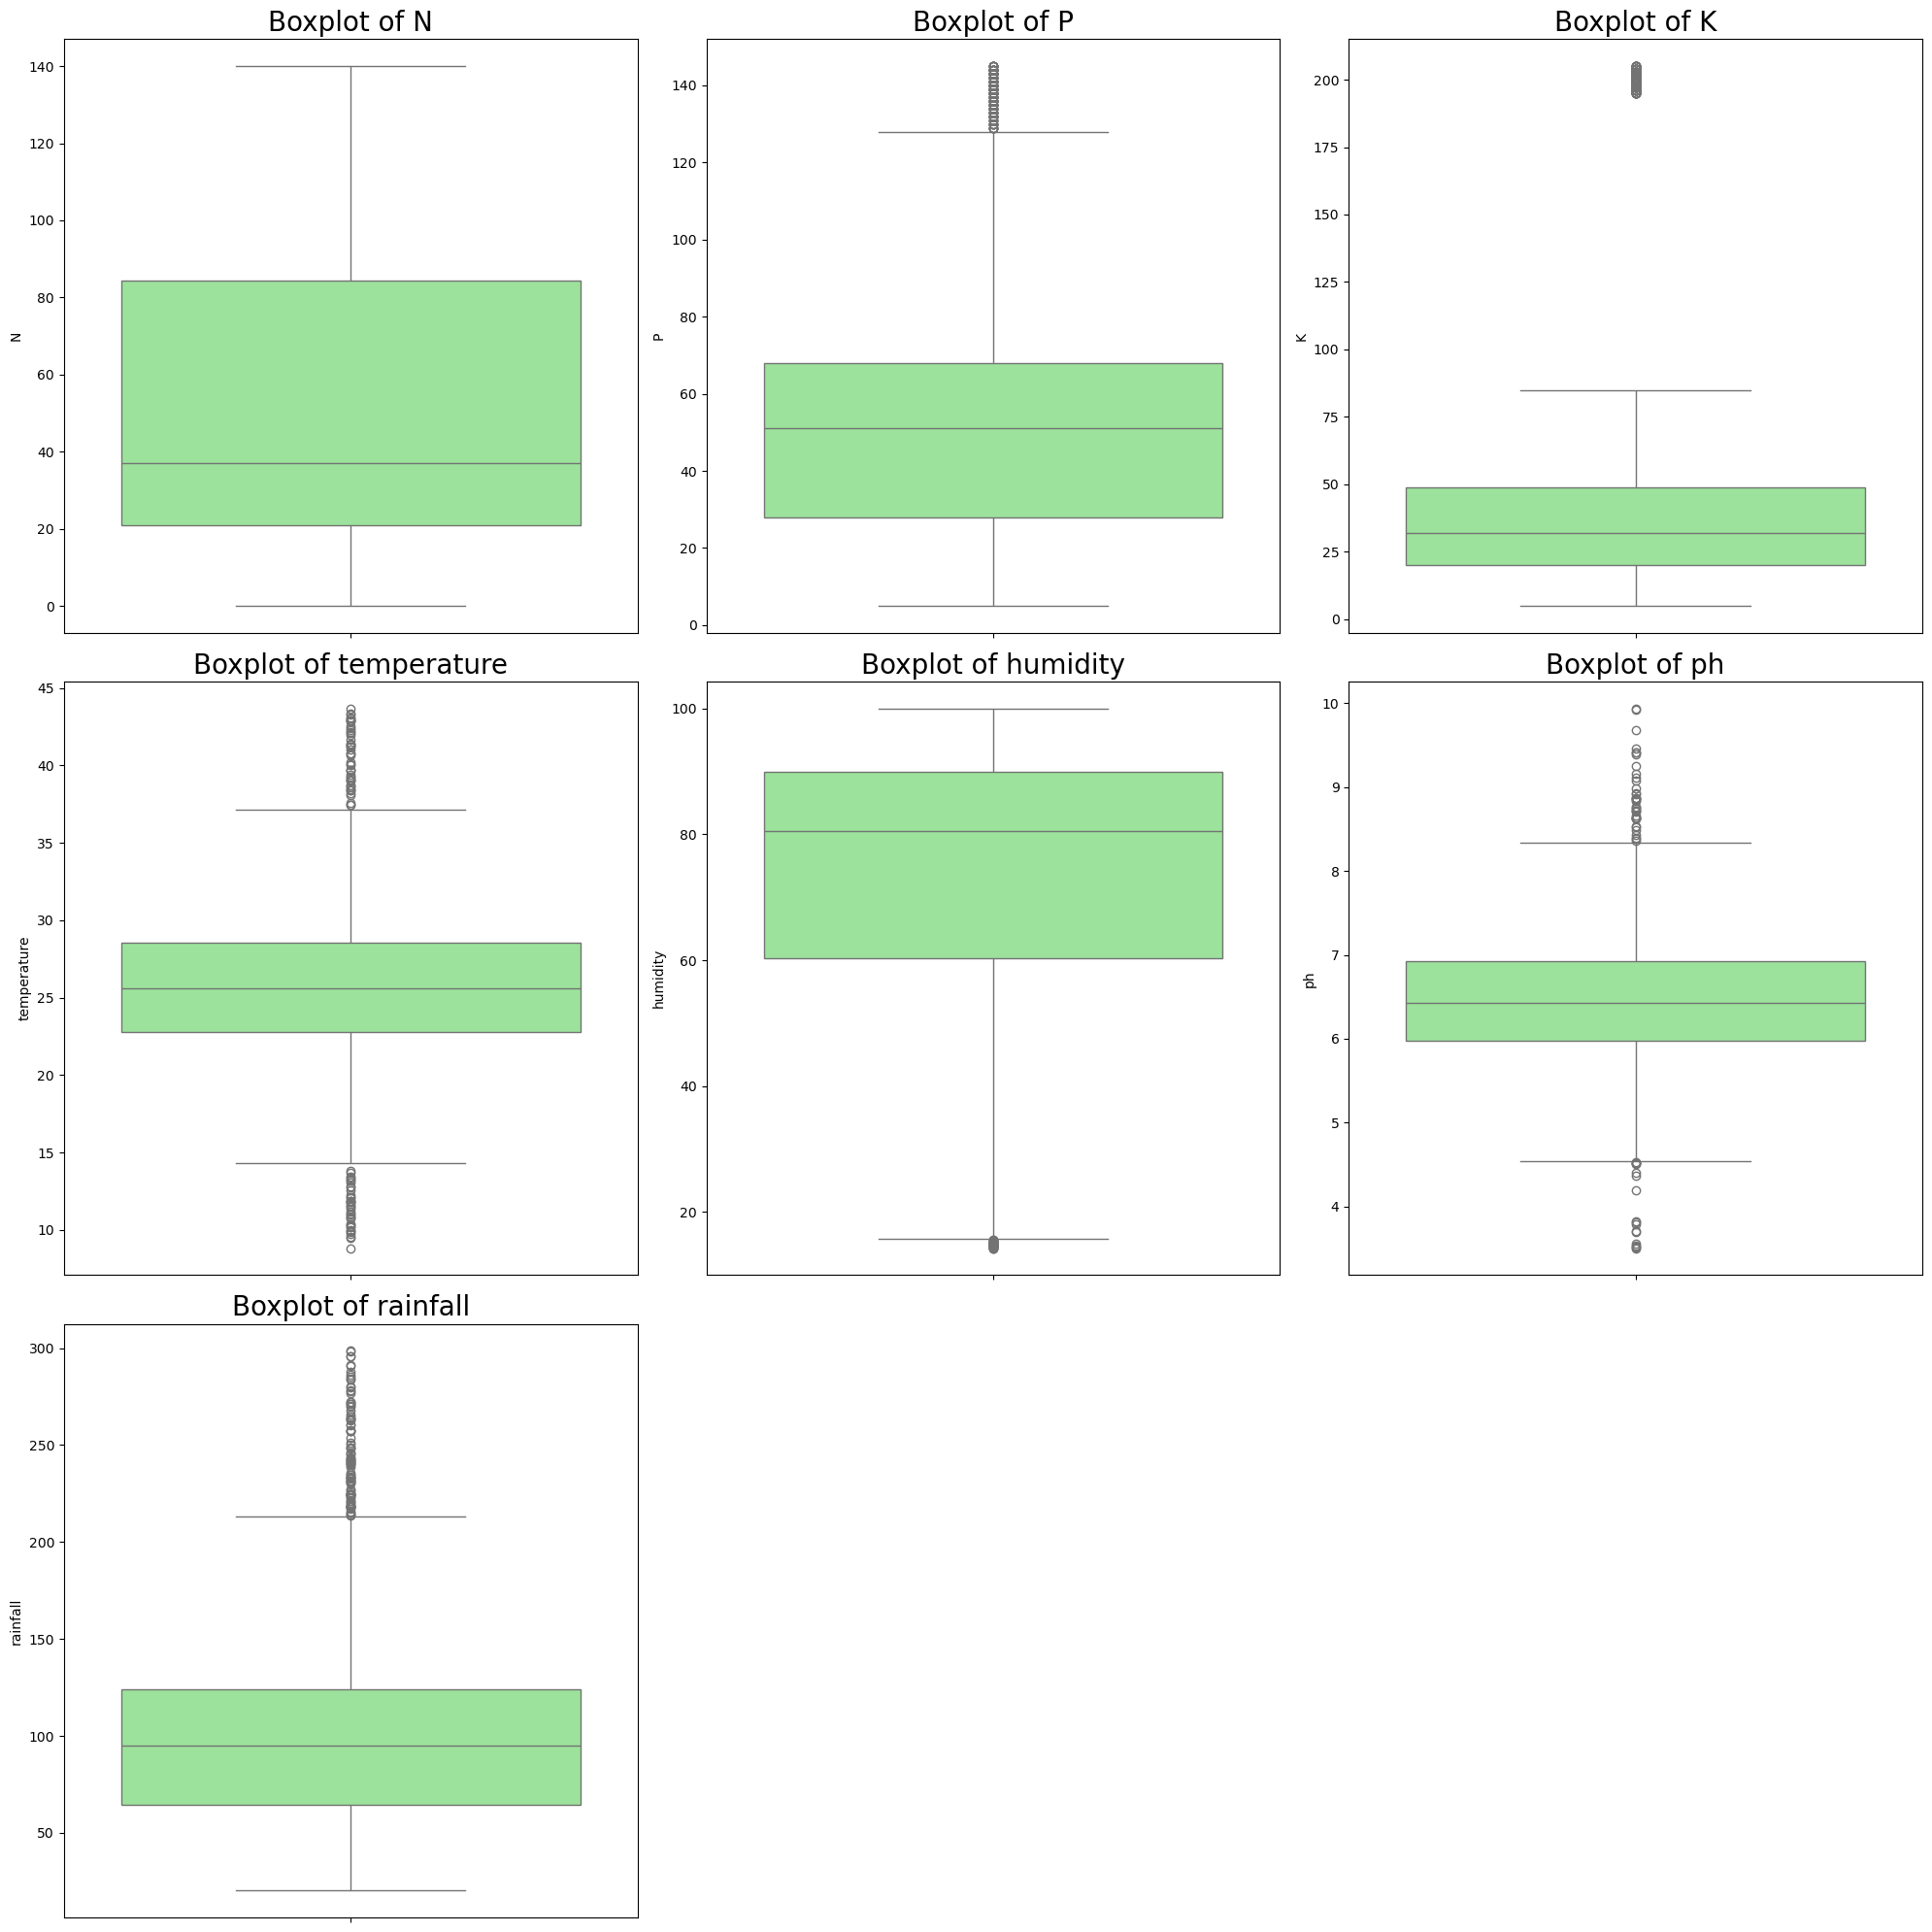

In [14]:
#create box plot for each feature to check for outliers

# Create a 3x3 grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(20,20))

# Loop over each feature and corresponding subplot
for i, subplot in zip(features, ax.flatten()):
    # Plot the boxplot for the feature
    sns.boxplot(y=crop[i], ax=subplot, color='lightgreen')
    
    # Set the title for the subplot
    subplot.set_title(f'Boxplot of {i}', fontsize=20)
    subplot.set_ylabel(i)

# Remove unused subplots (if any)
for j in range(len(features), 9):
    fig.delaxes(ax.flatten()[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Display all boxplots
plt.show()


In [15]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [16]:
# Importing required library
import numpy as np

# Create a copy of the original dataset
crop_cleaned = crop.copy()

# Loop through each feature to remove outliers
for col in features:
    Q1 = crop_cleaned[col].quantile(0.25)       # 25th percentile
    Q3 = crop_cleaned[col].quantile(0.75)       # 75th percentile
    IQR = Q3 - Q1                               # Interquartile Range

    # Define bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only the rows where the feature value is within the bounds
    crop_cleaned = crop_cleaned[(crop_cleaned[col] >= lower_bound) & (crop_cleaned[col] <= upper_bound)]

# Print the new shape to see how much data was removed
print("Original shape:", crop.shape)
print("Shape after removing outliers:", crop_cleaned.shape)


Original shape: (2200, 8)
Shape after removing outliers: (1846, 8)


In [17]:
crop_cleaned

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [18]:
# Checking the correlation of the features (after outlier removal)

# Select only numeric columns from the cleaned dataset
numeric_columns = crop_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Display the correlation matrix
corr


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.083995,0.295327,-0.019606,0.259423,0.081034,-0.009958
P,-0.083995,1.000000,0.002420,-0.099607,-0.480217,0.021027,-0.031233
K,0.295327,0.002420,1.000000,-0.155218,-0.052680,0.041257,0.001241
temperature,-0.019606,-0.099607,-0.155218,1.000000,0.303173,-0.033424,-0.078947
humidity,0.259423,-0.480217,-0.052680,0.303173,1.000000,0.080390,0.048510
ph,0.081034,0.021027,0.041257,-0.033424,0.080390,1.000000,-0.152517
rainfall,-0.009958,-0.031233,0.001241,-0.078947,0.048510,-0.152517,1.000000


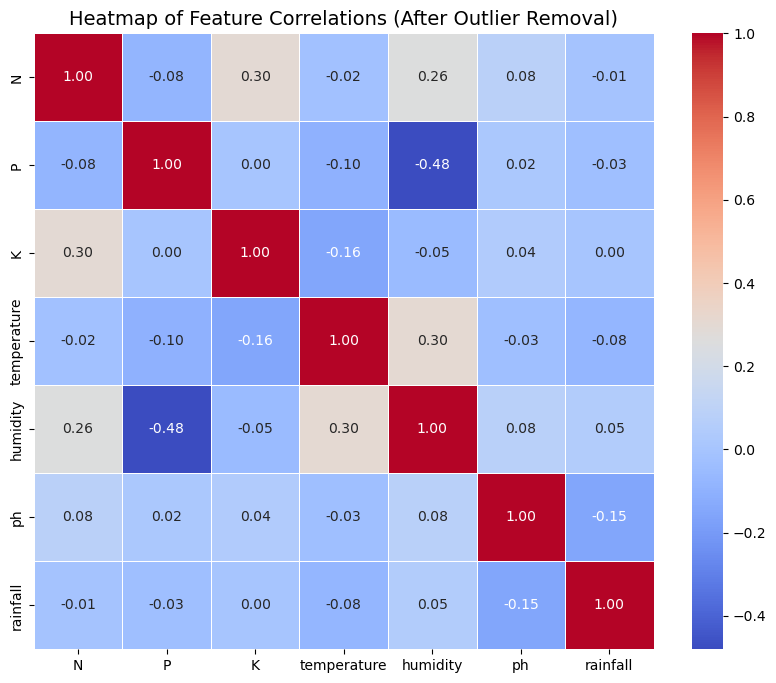

In [19]:
# Visualize the correlation matrix (after outlier removal)
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 8))  

# Create the heatmap using the updated correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a descriptive title
plt.title("Heatmap of Feature Correlations (After Outlier Removal)", fontsize=14)

# Show the plot
plt.show()


## Encoding (Preprocessing)

In [20]:
print(crop_cleaned['label'].unique().tolist())

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [21]:
#encoding the label into numeric values for model building
crop_dict={
    'rice':1,
    'maize':2,
    'chickpea':3,
    'kidneybeans':4,
    'pigeonpeas':5,
    'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}

In [22]:
crop_cleaned

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [23]:
#coverting the crop_dict into a column and inserting it in the crop df
crop_cleaned['crop_no']=crop_cleaned['label'].map(crop_dict)
# Display the first few rows of the updated dataframe to confirm the changes
print(crop_cleaned[['label', 'crop_no']].head())

  label  crop_no
0  rice        1
1  rice        1
3  rice        1
7  rice        1
8  rice        1


In [24]:
crop_cleaned['crop_no'].value_counts()

crop_no
11    100
10    100
21    100
20    100
19    100
15    100
14    100
2     100
22    100
9     100
8     100
7     100
4     100
12     96
5      96
3      88
17     81
18     63
1      62
6      60
Name: count, dtype: int64

In [25]:
crop2=crop_cleaned

In [26]:
crop2

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,1
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [27]:
#drop the label column so that the df has only numeric values
crop2.drop('label', axis=1, inplace=True)
crop2.tail()


,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


## Model Selection and Training

__Train test split__

In [28]:
# Separate features and target variable
X = crop2.drop('crop_no', axis=1)   # X contains all columns except 'crop_no'
y = crop2['crop_no']                # y contains only the 'crop_no' column (the target)

# Print the shapes to confirm dimensions
print(f"The shape of X is: {X.shape}")  # Rows × Number of feature columns
print(f"The shape of y is: {y.shape}")  # Rows (1D array for target values)


The shape of X is: (1846, 7)
The shape of y is: (1846,)


In [29]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [30]:
# Print the shapes of the training and test datasets to confirm the split
print(f"Shape of X_train: {X_train.shape}")  # X_train contains 80% of the features for training (Rows, Features)
print(f"Shape of y_train: {y_train.shape}")  # y_train contains 80% of the target variable (Rows,)
print(f"Shape of X_test: {X_test.shape}")    # X_test contains 20% of the features for testing (Rows, Features)
print(f"Shape of y_test: {y_test.shape}")    # y_test contains 20% of the target variable (Rows,)


Shape of X_train: (1476, 7)
Shape of y_train: (1476,)
Shape of X_test: (370, 7)
Shape of y_test: (370,)


## Scaling

In [31]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler
sc = StandardScaler()

# Fit the scaler on training data and transform it
# This step changes the data so all features have similar scale (mean = 0, std = 1)
X_train = sc.fit_transform(X_train)

# Use the same scaling on the test data
X_test = sc.transform(X_test)

# Scaling is important because it helps the model learn better and faster,
# especially when features have very different ranges (like 0-1 vs 0-1000)
# Scaling is like giving every feature the same unit or voice, so no one overpowers the rest!


## Training Models

In [34]:
#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt = DecisionTreeClassifier(random_state=2)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  # Try shallow and deeper trees
    'min_samples_split': [2, 5, 10],    # Try splitting nodes with more samples
    'min_samples_leaf': [1, 2, 5],      # Try leaf nodes with different min samples
    'max_features': ['auto', 'sqrt', 'log2', None],  # Try different feature selections
    'criterion': ['gini', 'entropy']   # Try different criteria for splitting nodes
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the test data
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9730
Test Precision: 0.9769


In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)  # Added probability=True if needed later
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=15) #based on the above result of max_depth
lrc = LogisticRegression(solver='liblinear', penalty='l2', multi_class='auto')  # Added multi_class='auto'
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [37]:
# Dictionary of models
clfs = {
    'SVC': svc,
    'KNN': knc,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc
}

In [38]:
import pandas as pd

# Initialize the lists to store the results
accuracy_scores = []
precision_scores = []

# Function to train and evaluate a classifier
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    # Predict on test data
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')

    # Predict on training data
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')

    return train_accuracy, train_precision, test_accuracy, test_precision

# Loop through selected models and store the results
for name, clf in clfs.items():
    train_acc, train_prec, test_acc, test_prec = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Store the results in the lists
    accuracy_scores.append(test_acc)
    precision_scores.append(test_prec)

    print(f"\nModel: {name}")
    print(f"Training Accuracy: {train_acc:.4f}, Training Precision: {train_prec:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}, Testing Precision:  {test_prec:.4f}")




Model: SVC
Training Accuracy: 0.4051, Training Precision: 0.4216
Testing Accuracy:  0.4243, Testing Precision:  0.4873

Model: KNN
Training Accuracy: 0.9898, Training Precision: 0.9908
Testing Accuracy:  0.9649, Testing Precision:  0.9713

Model: DecisionTree
Training Accuracy: 1.0000, Training Precision: 1.0000
Testing Accuracy:  0.9730, Testing Precision:  0.9769

Model: LogisticRegression
Training Accuracy: 0.9499, Training Precision: 0.9473
Testing Accuracy:  0.9514, Testing Precision:  0.9553

Model: RandomForest
Training Accuracy: 1.0000, Training Precision: 1.0000
Testing Accuracy:  0.9838, Testing Precision:  0.9882


In [39]:
# Create a DataFrame to store the performance metrics
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

# Display the performance DataFrame
print(performance_df)


            Algorithm  Accuracy  Precision
0                 SVC  0.424324   0.487272
1                 KNN  0.964865   0.971280
2        DecisionTree  0.972973   0.976940
3  LogisticRegression  0.951351   0.955290
4        RandomForest  0.983784   0.988203


## Predictive System

In [40]:
# Now create the predictive system based on the trained models
crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
             8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
             14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
             19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

def crop_recommend(model, scaler, N, P, K, temperature, humidity, ph, rainfall):
    # Features array for prediction
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # If scaling is required, apply scaling to the features
    transformed_features = scaler.transform(features)
    
    # Predict the crop class
    prediction = model.predict(transformed_features).reshape(1, -1)
    
    # Map predicted class to crop name
    crop = [crop_dict[i] for i in prediction[0]]
    
    return f"{crop[0]} is the best crop to be cultivated."

# Example usage
# Assuming you have a trained model and scaler like StandardScaler (sc) fitted on training data
# Example with DecisionTreeClassifier (DT) and StandardScaler (sc)

# Select the best model based on performance (e.g., highest accuracy)
best_model_name = performance_df.loc[performance_df['Accuracy'].idxmax(), 'Algorithm']
best_model = clfs[best_model_name]

print(f"\nUsing the best model: {best_model_name}")




Using the best model: RandomForest


__checking the model on different parameter values__

In [41]:
# Example with the best model for prediction
recommended_crop = crop_recommend(best_model, sc, N=100, P=50, K=30, temperature=25, humidity=80, ph=6.5, rainfall=200)
print(recommended_crop)

Rice is the best crop to be cultivated.


In [42]:
# Predicting the crop for the given environment
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(best_model,sc,N,P,K,temperature,humidity,ph,rainfall)


'Rice is the best crop to be cultivated.'

In [43]:
recommended_crop = crop_recommend(best_model, sc, N=120, P=45, K=50, temperature=28, humidity=70, ph=6.8, rainfall=180)
print(recommended_crop)


Coffee is the best crop to be cultivated.


In [44]:
recommended_crop = crop_recommend(best_model, sc, N=100, P=60, K=80, temperature=30, humidity=75, ph=6.5, rainfall=150)
print(recommended_crop)


Chickpea is the best crop to be cultivated.


In [45]:
recommended_crop = crop_recommend(best_model, sc, N=90, P=50, K=60, temperature=34, humidity=85, ph=6.5, rainfall=220)
print(recommended_crop)


Mothbeans is the best crop to be cultivated.


In [46]:
recommended_crop = crop_recommend(best_model, sc, N=130, P=75, K=70, temperature=27, humidity=75, ph=6.8, rainfall=250)
print(recommended_crop)


Grapes is the best crop to be cultivated.


In [47]:
recommended_crop = crop_recommend(best_model, sc, N=100, P=50, K=65, temperature=24, humidity=80, ph=6.8, rainfall=180)
print(recommended_crop)


Chickpea is the best crop to be cultivated.


In [48]:
recommended_crop = crop_recommend(best_model, sc, N=75, P=50, K=65, temperature=22, humidity=70, ph=6.6, rainfall=170)
print(recommended_crop)


Jute is the best crop to be cultivated.


In [49]:
recommended_crop = crop_recommend(best_model, sc, N=100, P=65, K=85, temperature=35, humidity=75, ph=6.8, rainfall=200)
print(recommended_crop)


Mothbeans is the best crop to be cultivated.


In [50]:
recommended_crop = crop_recommend(best_model, sc, N=115, P=65, K=75, temperature=26, humidity=85, ph=6.5, rainfall=200)
print(recommended_crop)


Grapes is the best crop to be cultivated.


In [51]:
recommended_crop = crop_recommend(best_model, sc, N=60, P=35, K=45, temperature=22, humidity=65, ph=6.5, rainfall=120)
print(recommended_crop)


Coffee is the best crop to be cultivated.


__saving the model for future use__

In [52]:
import pickle

# Saving the best model (RandomForest in this case)
pickle.dump(best_model, open('best_crop_model.sav', 'wb'))

# Save the scaler used for scaling features
pickle.dump(sc, open('crop_scaler.sav', 'wb'))


__using the trained saved model for new predictions__

In [53]:
# Load the saved model and scaler
best_model = pickle.load(open('best_crop_model.sav', 'rb'))
sc = pickle.load(open('crop_scaler.sav', 'rb'))

In [54]:
# Example usage: Making predictions
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

# Call the crop_recommend function with the loaded model and scaler
crop_recommendation = crop_recommend(best_model, sc, N, P, K, temperature, humidity, ph, rainfall)

print(crop_recommendation)

Rice is the best crop to be cultivated.


In [55]:
N = 75
P = 45
K = 35
temperature = 28
humidity = 75
ph = 6.5
rainfall = 150

# Get the crop recommendation using the loaded model
crop_recommendation = crop_recommend(best_model, sc, N, P, K, temperature, humidity, ph, rainfall)

# Print the recommended crop
print(crop_recommendation)

Chickpea is the best crop to be cultivated.


In [56]:
# Define features for another example
N = 90
P = 20
K = 15
temperature = 30
humidity = 65
ph = 6.2
rainfall = 120

# Get the crop recommendation using the loaded model
crop_recommendation = crop_recommend(best_model, sc, N, P, K, temperature, humidity, ph, rainfall)

# Print the recommended crop
print(crop_recommendation)

Maize is the best crop to be cultivated.


In [57]:
# Define features for this set of conditions
N = 40
P = 50
K = 30
temperature = 25
humidity = 85
ph = 6.3
rainfall = 100

# Get the crop recommendation
crop_recommendation = crop_recommend(best_model, sc, N, P, K, temperature, humidity, ph, rainfall)

# Print the recommended crop
print(crop_recommendation)

Watermelon is the best crop to be cultivated.


In [58]:

N = 100
P = 40
K = 60
temperature = 30
humidity = 65
ph = 6.5
rainfall = 200

print(crop_recommend(best_model, sc, N, P, K, temperature, humidity, ph, rainfall)) 


Coffee is the best crop to be cultivated.
